In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Found cached dataset csv (C:/Users/default.ASUS/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-8492436fa5796c3e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
df_DA_US =df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

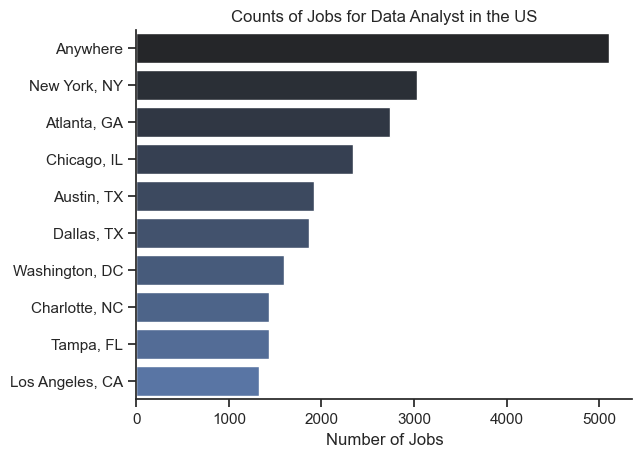

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['job_location', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b')
sns.despine()
plt.title('Counts of Jobs for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


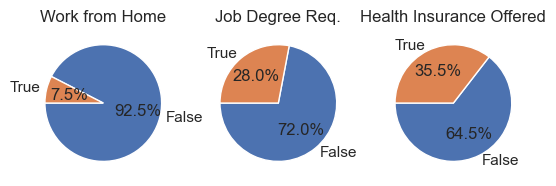

In [18]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),startangle=180, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

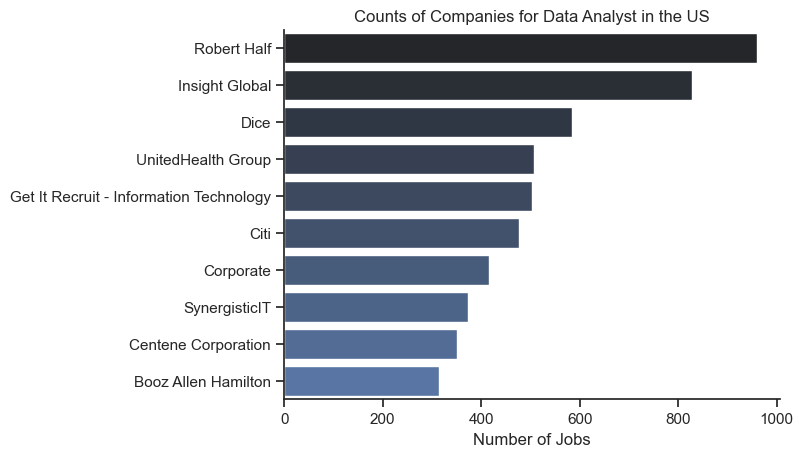

In [14]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['company_name', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:b')
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()